In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
income = pd.read_csv ('datasets/kaggle_income.csv', encoding='cp1252')
income.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [3]:
PercentagePeopleBelowPovertyLevel = pd.read_csv('datasets/PercentagePeopleBelowPovertyLevel.csv', encoding='cp1252')
PercentagePeopleBelowPovertyLevel.columns = ['Geographic_area', 'City', 'poverty_rate']
PercentagePeopleBelowPovertyLevel.head()

,Geographic_area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
PercentOver25CompletedHighSchool = pd.read_csv('datasets/PercentOver25CompletedHighSchool.csv', encoding='cp1252')
PercentOver25CompletedHighSchool.columns = ['Geographic_area', 'City', 'percent_completed_hs']
PercentOver25CompletedHighSchool.head()

,Geographic_area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [5]:
ShareRaceByCity = pd.read_csv('datasets/ShareRaceByCity.csv', encoding='cp1252')
ShareRaceByCity.head()

,Geographic_area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [6]:
df = ShareRaceByCity.merge(PercentOver25CompletedHighSchool, on=['Geographic_area', 'City'], how='left')
df = df.merge(PercentagePeopleBelowPovertyLevel, on=['Geographic_area', 'City'], how='left')
df.head()

,Geographic_area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,percent_completed_hs,poverty_rate
0,AL,Abanda CDP,67.2,30.2,0,0,1.6,21.2,78.8
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1,69.1,29.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3,78.9,25.5
3,AL,Addison town,99.1,0.1,0,0.1,0.4,81.4,30.7
4,AL,Akron town,13.2,86.5,0,0,0.3,68.6,42


In [7]:
cities = df['City'].str.rsplit(" ", n=1, expand = True)
df['City'] = cities[0]
df.columns = ['State_ab', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic', 'poverty_rate', 'percent_completed_hs']
df.head()

,State_ab,City,share_white,share_black,share_native_american,share_asian,share_hispanic,poverty_rate,percent_completed_hs
0,AL,Abanda,67.2,30.2,0,0,1.6,21.2,78.8
1,AL,Abbeville,54.4,41.4,0.1,1,3.1,69.1,29.1
2,AL,Adamsville,52.3,44.9,0.5,0.3,2.3,78.9,25.5
3,AL,Addison,99.1,0.1,0,0.1,0.4,81.4,30.7
4,AL,Akron,13.2,86.5,0,0,0.3,68.6,42


In [8]:
df = income.merge(df, on=['State_ab', 'City'], how='inner')
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,...,Median,Stdev,sum_w,share_white,share_black,share_native_american,share_asian,share_hispanic,poverty_rate,percent_completed_hs
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,...,30506,33101,1638.260513,63,33.6,0.8,0.5,2.3,79.9,33.6
1,102826,1,Alabama,AL,Autauga County,Chickasaw,Autaugaville,Track,Track,36611,...,20116,21663,431.982138,63,33.6,0.8,0.5,2.3,79.9,33.6
2,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,...,19528,43789,258.017685,49.3,44.1,0.8,0,7.9,65.7,11.8
3,10246,1,Alabama,AL,Autauga County,Louisville,Autaugaville,Track,Track,36048,...,27636,33907,870.206244,49.3,44.1,0.8,0,7.9,65.7,11.8
4,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,...,31930,57348,926.031000,71.3,25.1,0.3,0.2,3,74.4,24


In [9]:
df = df.dropna()
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,...,Median,Stdev,sum_w,share_white,share_black,share_native_american,share_asian,share_hispanic,poverty_rate,percent_completed_hs
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,...,30506,33101,1638.260513,63,33.6,0.8,0.5,2.3,79.9,33.6
1,102826,1,Alabama,AL,Autauga County,Chickasaw,Autaugaville,Track,Track,36611,...,20116,21663,431.982138,63,33.6,0.8,0.5,2.3,79.9,33.6
2,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,...,19528,43789,258.017685,49.3,44.1,0.8,0,7.9,65.7,11.8
3,10246,1,Alabama,AL,Autauga County,Louisville,Autaugaville,Track,Track,36048,...,27636,33907,870.206244,49.3,44.1,0.8,0,7.9,65.7,11.8
4,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,...,31930,57348,926.031000,71.3,25.1,0.3,0.2,3,74.4,24


In [10]:
df = df[~df['Type'].isin(['County', 'Municipality'])]

In [11]:
df['Type'].value_counts()

Track      25407
City        1018
CDP          884
Town         450
Village      372
Borough      120
Name: Type, dtype: int64

## 1. Distribution of education rate, poverty rate, median income, land area, and water area by the city in the United States

<AxesSubplot:xlabel='percent_completed_hs', ylabel='Count'>

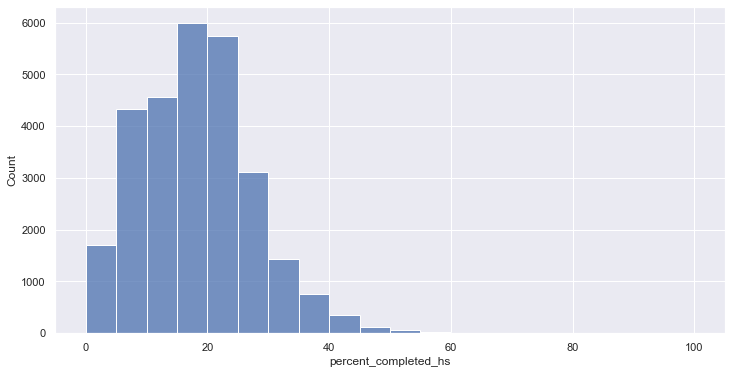

In [12]:
df['percent_completed_hs'] = pd.to_numeric(df['percent_completed_hs'],errors = 'coerce')
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(df['percent_completed_hs'], bins=20)

<AxesSubplot:xlabel='poverty_rate', ylabel='Count'>

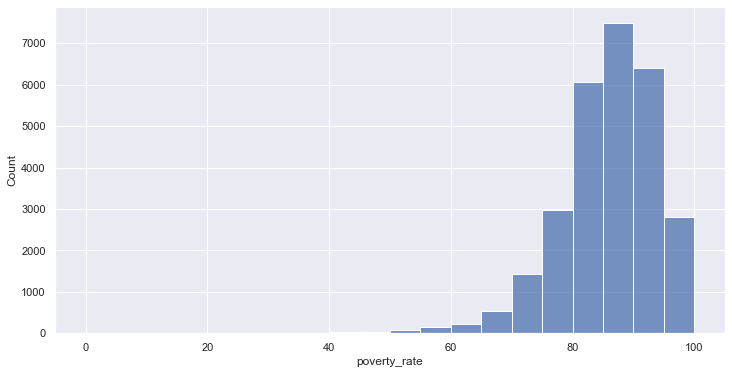

In [13]:
df['poverty_rate'] = pd.to_numeric(df['poverty_rate'],errors = 'coerce')
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(df['poverty_rate'], bins=20)

<AxesSubplot:xlabel='Median', ylabel='Count'>

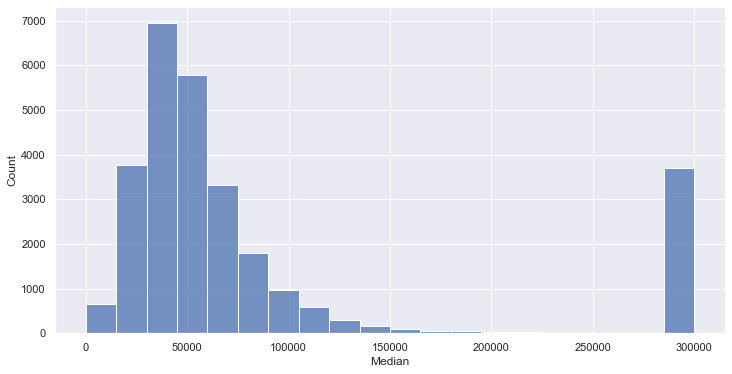

In [14]:
df['Median'] = pd.to_numeric(df['Median'],errors = 'coerce')
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(df['Median'], bins=20)

<AxesSubplot:xlabel='ALand', ylabel='Count'>

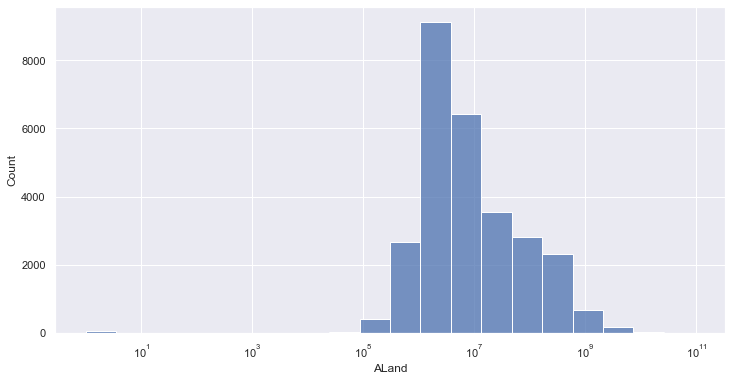

In [15]:
df['ALand'] = pd.to_numeric(df['ALand'],errors = 'coerce')
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(df['ALand']+1, bins=20, log_scale=True)

<AxesSubplot:xlabel='AWater', ylabel='Count'>

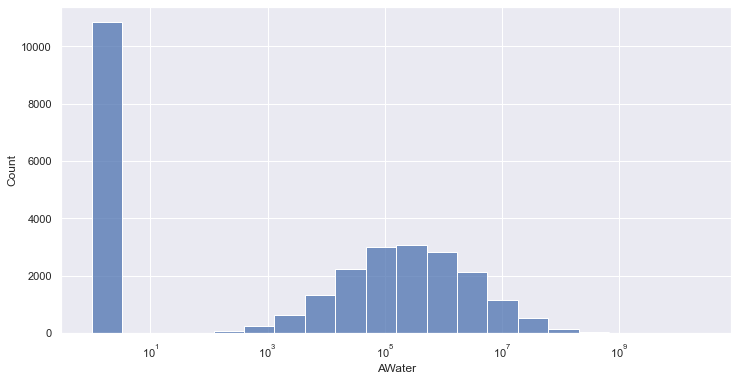

In [16]:
df['AWater'] = pd.to_numeric(df['AWater'],errors = 'coerce')
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(df['AWater']+1, bins=20, log_scale=True)

## 2. Relationship between city location and education rate, poverty rate, median income, land area, and water area

In [17]:
def findDivision(state_ab):
    new_england = ['ME', 'VT', 'NH', 'MA', 'CT', 'RI']
    middle_atlantic = ['NY', 'PA', 'NJ']
    east_north_central = ['WI', 'MI', 'IL', 'IN', 'OH']
    west_north_central = ['ND', 'SD', 'MN', 'NE', 'IA', 'KS', 'MO']
    south_atlantic = ['WV', 'MD', 'DE', 'DC', 'VA', 'NC', 'SC', 'GA', 'FL']
    east_south_central = ['KY', 'TN', 'MS', 'AL']
    west_south_central = ['OK', 'AR', 'TX', 'LA']
    mountain = ['MT', 'ID', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM']
    pacific = ['AK', 'WA', 'OR', 'CA', 'HI']
    if state_ab in new_england:
        return 'New England'
    elif state_ab in middle_atlantic:
        return 'Middle Atlantic'
    elif state_ab in east_north_central:
        return 'East North Central'
    elif state_ab in west_north_central:
        return 'West North Central'
    elif state_ab in south_atlantic:
        return 'South Atlantic'
    elif state_ab in east_south_central:
        return 'East South Central'
    elif state_ab in west_south_central:
        return 'West South Central'
    elif state_ab in mountain:
        return 'Mountain'
    else:
        return 'Pacific'

In [18]:
df['Division'] = df.apply(lambda x: findDivision(x.State_ab), axis=1)
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,...,Stdev,sum_w,share_white,share_black,share_native_american,share_asian,share_hispanic,poverty_rate,percent_completed_hs,Division
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,...,33101,1638.260513,63,33.6,0.8,0.5,2.3,79.9,33.6,East South Central
1,102826,1,Alabama,AL,Autauga County,Chickasaw,Autaugaville,Track,Track,36611,...,21663,431.982138,63,33.6,0.8,0.5,2.3,79.9,33.6,East South Central
2,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,...,43789,258.017685,49.3,44.1,0.8,0,7.9,65.7,11.8,East South Central
3,10246,1,Alabama,AL,Autauga County,Louisville,Autaugaville,Track,Track,36048,...,33907,870.206244,49.3,44.1,0.8,0,7.9,65.7,11.8,East South Central
4,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,...,57348,926.031000,71.3,25.1,0.3,0.2,3,74.4,24.0,East South Central


Text(0.5, 1.0, 'Longtitude')

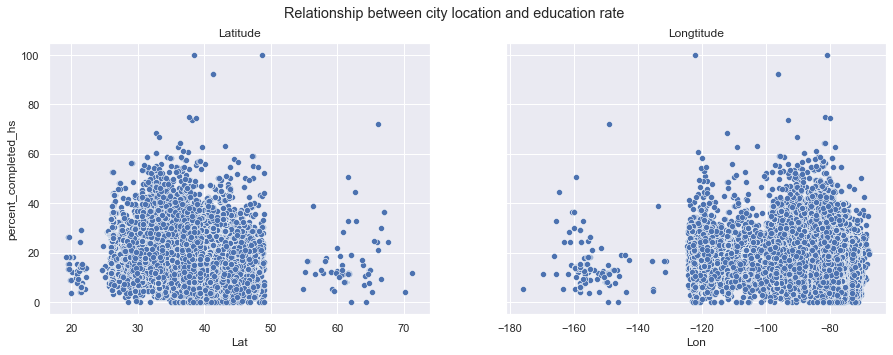

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Relationship between city location and education rate')

sns.scatterplot(ax=axes[0], x='Lat',y='percent_completed_hs',data=df)
axes[0].set_title('Latitude')

sns.scatterplot(ax=axes[1], x='Lon',y='percent_completed_hs',data=df)
axes[1].set_title('Longtitude')

<AxesSubplot:xlabel='Division', ylabel='percent_completed_hs'>

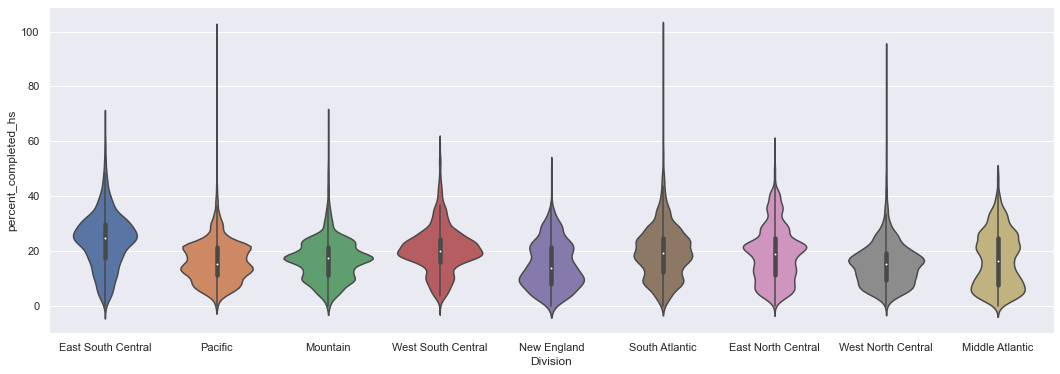

In [20]:
sns.set(rc={"figure.figsize": (18, 6)})
sns.violinplot(x='Division', y='percent_completed_hs', data=df)

Text(0.5, 1.0, 'Longtitude')

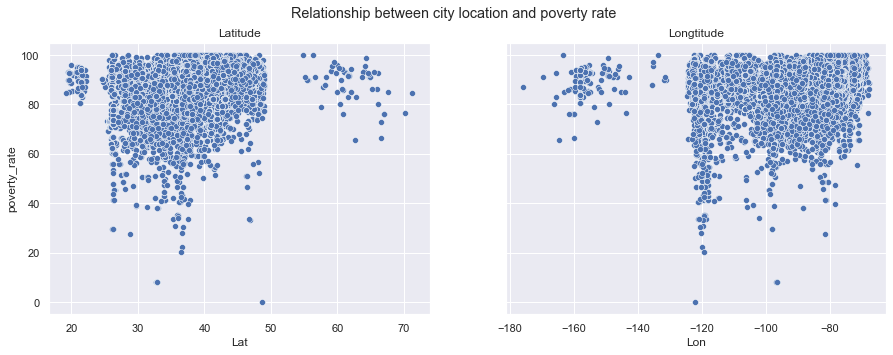

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Relationship between city location and poverty rate')

sns.scatterplot(ax=axes[0], x='Lat',y='poverty_rate',data=df)
axes[0].set_title('Latitude')

sns.scatterplot(ax=axes[1], x='Lon',y='poverty_rate',data=df)
axes[1].set_title('Longtitude')

<AxesSubplot:xlabel='Division', ylabel='poverty_rate'>

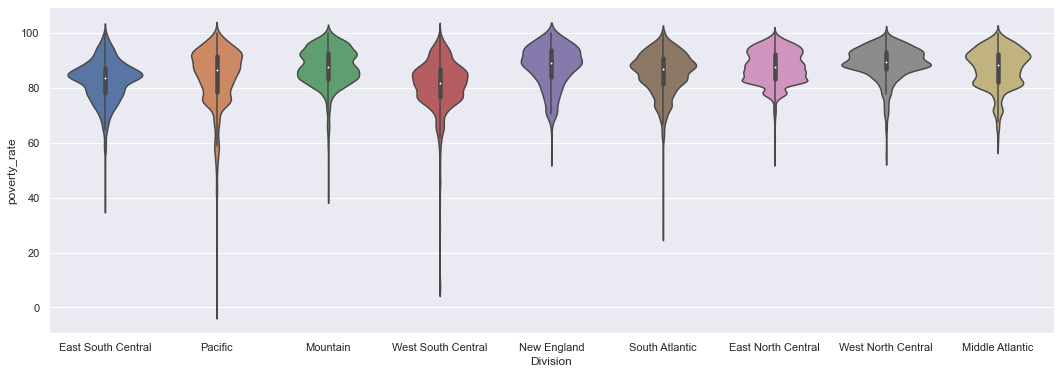

In [22]:
sns.set(rc={"figure.figsize": (18, 6)})
sns.violinplot(x='Division', y='poverty_rate', data=df)

Text(0.5, 1.0, 'Longtitude')

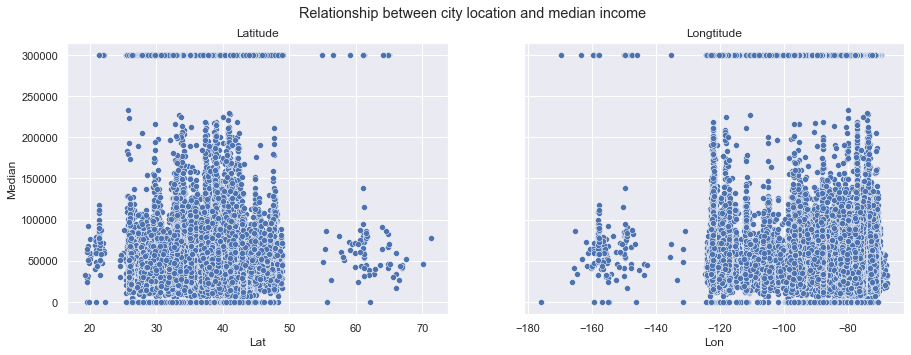

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Relationship between city location and median income')

sns.scatterplot(ax=axes[0], x='Lat',y='Median',data=df)
axes[0].set_title('Latitude')

sns.scatterplot(ax=axes[1], x='Lon',y='Median',data=df)
axes[1].set_title('Longtitude')

<AxesSubplot:xlabel='Division', ylabel='Median'>

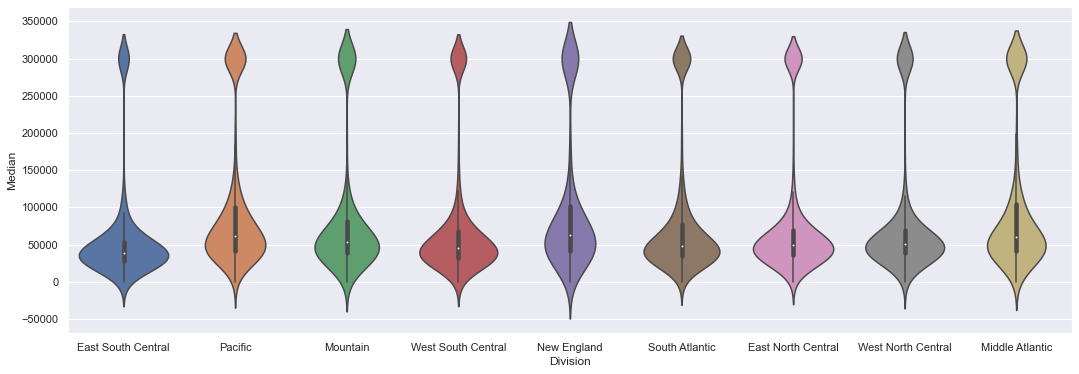

In [24]:
sns.set(rc={"figure.figsize": (18, 6)})
sns.violinplot(x='Division', y='Median', data=df)

Text(0.5, 1.0, 'Longtitude')

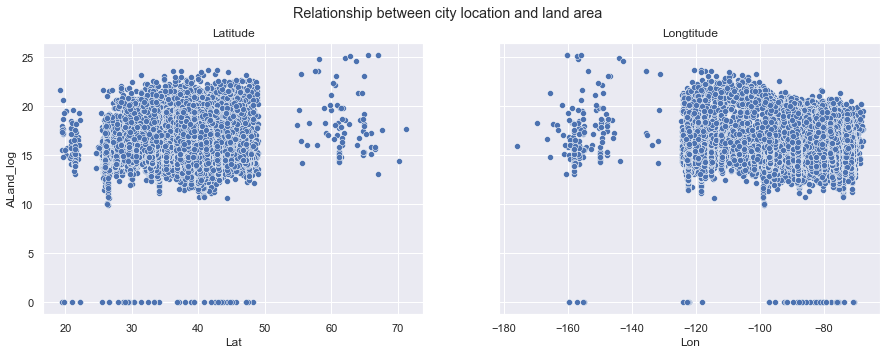

In [25]:
df['ALand_log'] = np.log(df['ALand']+1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Relationship between city location and land area')

sns.scatterplot(ax=axes[0], x='Lat',y='ALand_log',data=df)
axes[0].set_title('Latitude')

sns.scatterplot(ax=axes[1], x='Lon',y='ALand_log',data=df)
axes[1].set_title('Longtitude')

<AxesSubplot:xlabel='Division', ylabel='ALand_log'>

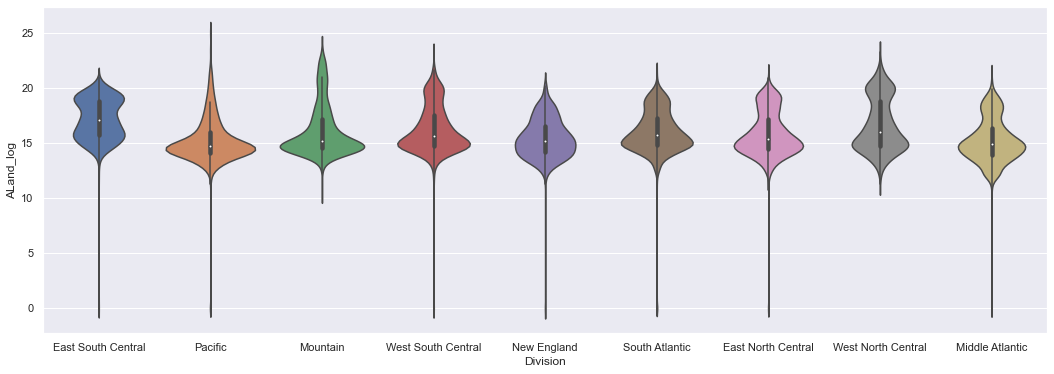

In [26]:
sns.set(rc={"figure.figsize": (18, 6)})
sns.violinplot(x='Division', y='ALand_log', data=df)

Text(0.5, 1.0, 'Longtitude')

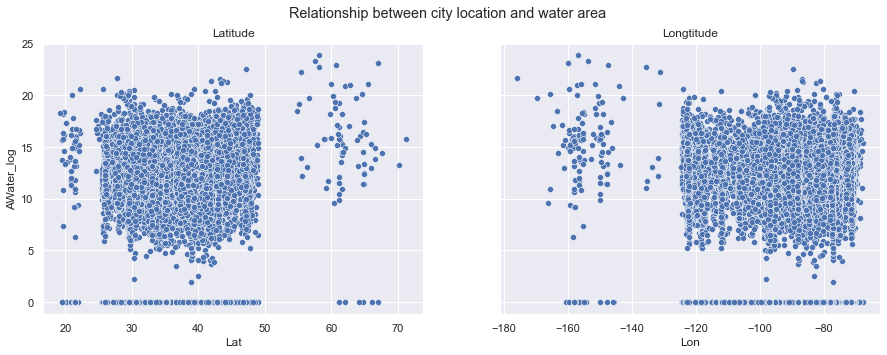

In [27]:
df['AWater_log'] = np.log(df['AWater']+1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Relationship between city location and water area')

sns.scatterplot(ax=axes[0], x='Lat',y='AWater_log',data=df)
axes[0].set_title('Latitude')

sns.scatterplot(ax=axes[1], x='Lon',y='AWater_log',data=df)
axes[1].set_title('Longtitude')

<AxesSubplot:xlabel='Division', ylabel='AWater_log'>

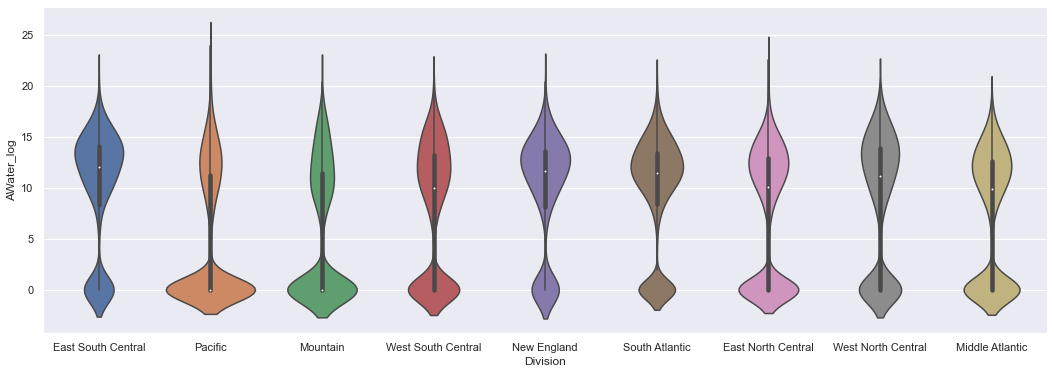

In [28]:
sns.set(rc={"figure.figsize": (18, 6)})
sns.violinplot(x='Division', y='AWater_log', data=df)

## 3. Relationship between city type and education rate, poverty rate, median income, land area, and water area

<AxesSubplot:xlabel='Type', ylabel='percent_completed_hs'>

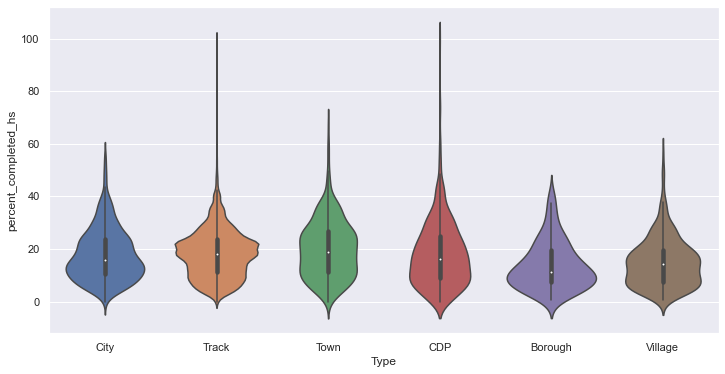

In [29]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.violinplot(x='Type', y='percent_completed_hs', data=df)

<AxesSubplot:xlabel='Type', ylabel='poverty_rate'>

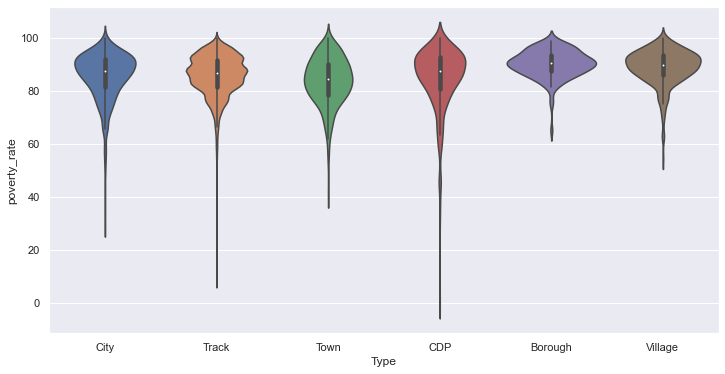

In [30]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.violinplot(x='Type', y='poverty_rate', data=df)

<AxesSubplot:xlabel='Type', ylabel='Median'>

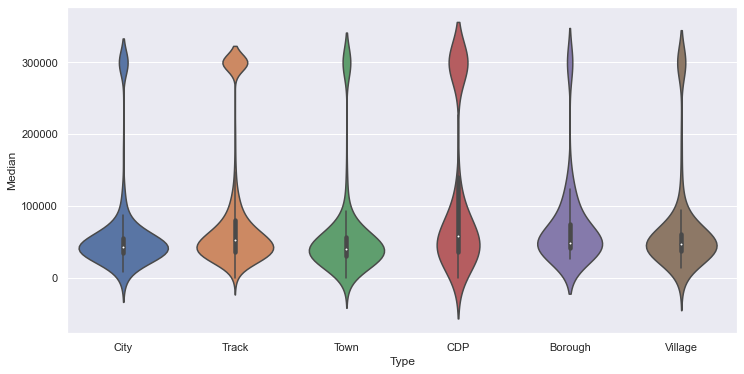

In [31]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.violinplot(x='Type', y='Median', data=df)

<AxesSubplot:xlabel='Type', ylabel='ALand_log'>

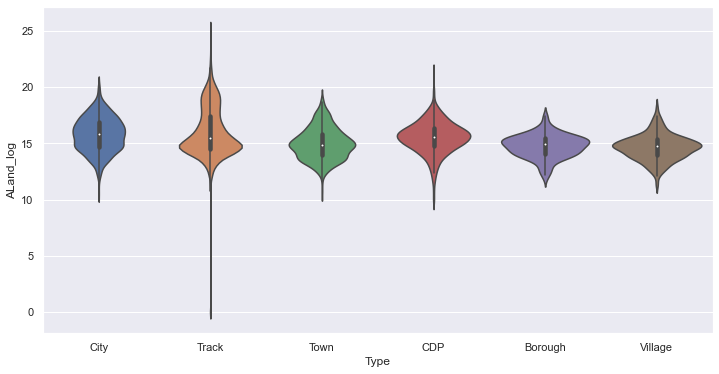

In [32]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.violinplot(x='Type', y='ALand_log', data=df)

<AxesSubplot:xlabel='Type', ylabel='AWater_log'>

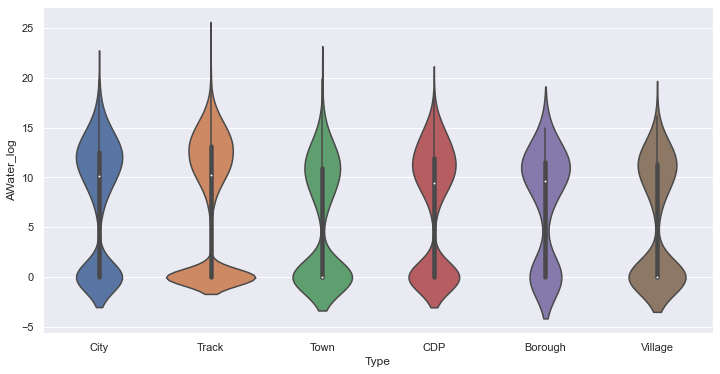

In [33]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.violinplot(x='Type', y='AWater_log', data=df)

## 4. Relationship between the city's dominant race and its type

In [34]:
def findDominantRace(share_white, share_black, share_native_american, share_asian, share_hispanic):
    max_share = max(share_white, share_black, share_native_american, share_asian, share_hispanic)
    if (share_white == max_share):
        return "White"
    elif (share_black == max_share):
        return "Black"
    elif (share_native_american == max_share):
        return "Native American"
    elif (share_asian == max_share):
        return "Asian"
    else:
        return "Hispanic"

In [35]:
df['share_white'] = pd.to_numeric(df['share_white'],errors = 'coerce')
df['share_black'] = pd.to_numeric(df['share_black'],errors = 'coerce')
df['share_native_american'] = pd.to_numeric(df['share_native_american'],errors = 'coerce')
df['share_asian'] = pd.to_numeric(df['share_asian'],errors = 'coerce')
df['share_hispanic'] = pd.to_numeric(df['share_hispanic'],errors = 'coerce')

In [36]:
df['Dominant_Race'] = df.apply(lambda x: findDominantRace(x.share_white, x.share_black, x.share_native_american, x.share_asian, x.share_hispanic), axis=1)
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,...,share_black,share_native_american,share_asian,share_hispanic,poverty_rate,percent_completed_hs,Division,ALand_log,AWater_log,Dominant_Race
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,...,33.6,0.8,0.5,2.3,79.9,33.6,East South Central,16.203810,13.720273,White
1,102826,1,Alabama,AL,Autauga County,Chickasaw,Autaugaville,Track,Track,36611,...,33.6,0.8,0.5,2.3,79.9,33.6,East South Central,13.796501,0.000000,White
2,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,...,44.1,0.8,0.0,7.9,65.7,11.8,East South Central,17.076308,10.054275,White
3,10246,1,Alabama,AL,Autauga County,Louisville,Autaugaville,Track,Track,36048,...,44.1,0.8,0.0,7.9,65.7,11.8,East South Central,20.063569,13.798997,White
4,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,...,25.1,0.3,0.2,3.0,74.4,24.0,East South Central,17.618506,12.472410,White


In [37]:
df['Dominant_Race'].value_counts()

White              24703
Black               2307
Hispanic             958
Asian                171
Native American      112
Name: Dominant_Race, dtype: int64

<AxesSubplot:xlabel='Dominant_Race', ylabel='Count'>

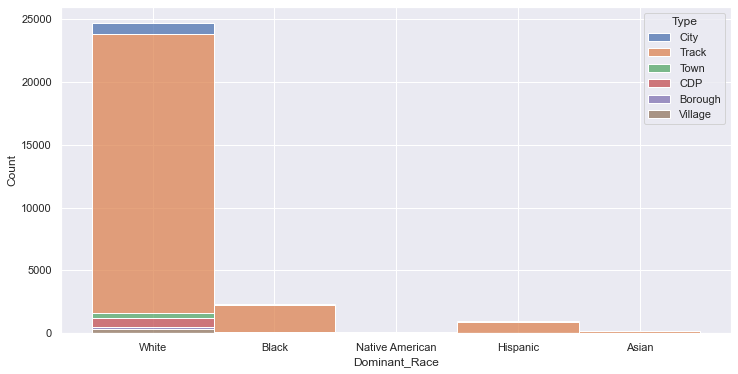

In [38]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(data=df, x="Dominant_Race", hue="Type", multiple="stack")

<AxesSubplot:xlabel='Dominant_Race', ylabel='Count'>

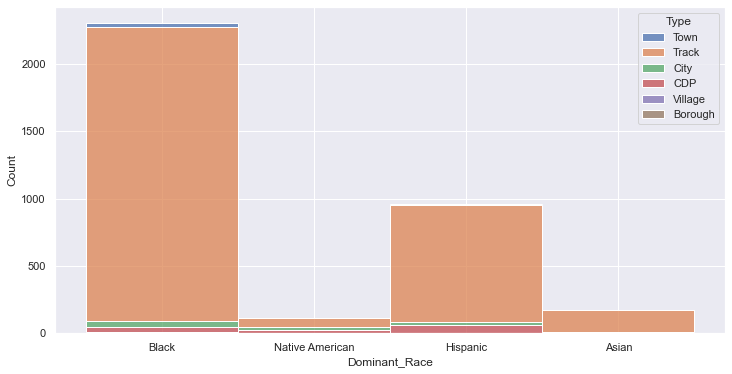

In [39]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(data=df[df['Dominant_Race'] != 'White'], x="Dominant_Race", hue="Type", multiple="stack")

<AxesSubplot:xlabel='Dominant_Race', ylabel='Count'>

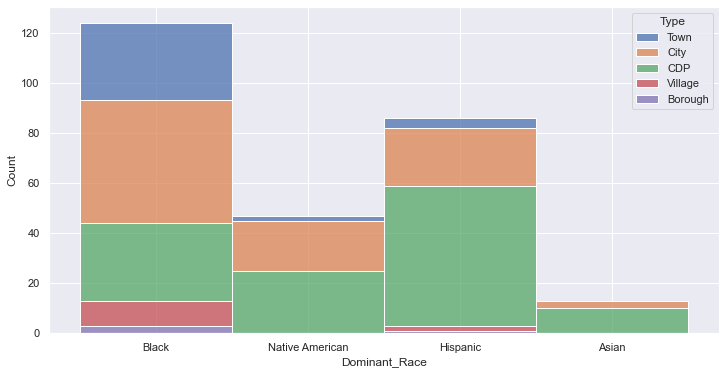

In [40]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(data=df[(df['Dominant_Race'] != 'White') & (df['Type'] != 'Track')], x="Dominant_Race", hue="Type", multiple="stack")

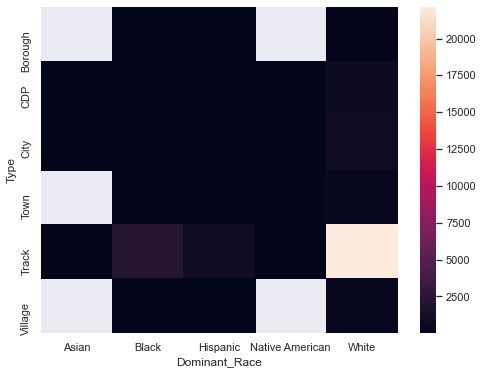

In [41]:
sns.set(rc={"figure.figsize": (8, 6)})
table = pd.pivot_table(df, values='State_ab', index='Type', columns='Dominant_Race', aggfunc=lambda x: x.value_counts().sum())
ax = sns.heatmap(table)

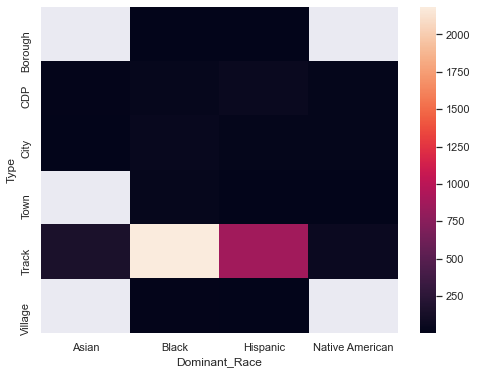

In [42]:
sns.set(rc={"figure.figsize": (8, 6)})
table2 = table.drop('White', axis=1)
ax = sns.heatmap(table2)

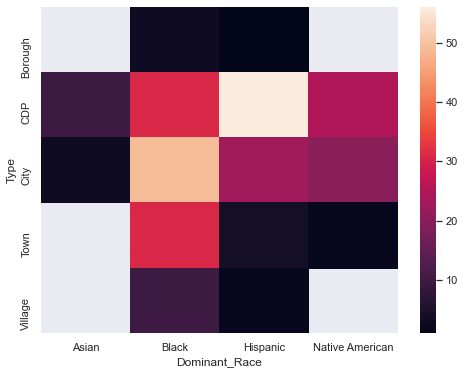

In [43]:
sns.set(rc={"figure.figsize": (8, 6)})
table3 = table2.drop('Track')
ax = sns.heatmap(table3)

## 5. Relationship between the city's dominant race and its geographic location

<AxesSubplot:xlabel='Dominant_Race', ylabel='Count'>

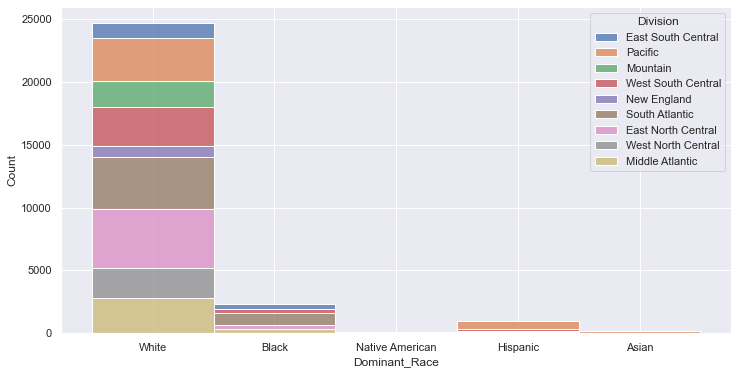

In [44]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(data=df, x="Dominant_Race", hue="Division", multiple="stack")

<AxesSubplot:xlabel='Dominant_Race', ylabel='Count'>

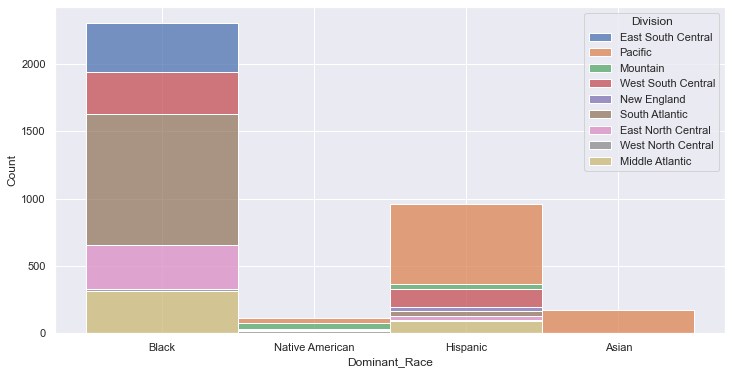

In [45]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.histplot(data=df[df['Dominant_Race'] != 'White'], x="Dominant_Race", hue="Division", multiple="stack")

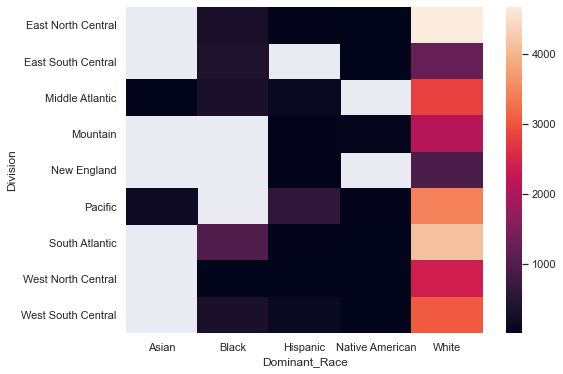

In [46]:
sns.set(rc={"figure.figsize": (8, 6)})
table = pd.pivot_table(df, values='State_ab', index='Division', columns='Dominant_Race', aggfunc=lambda x: x.value_counts().sum())
ax = sns.heatmap(table)

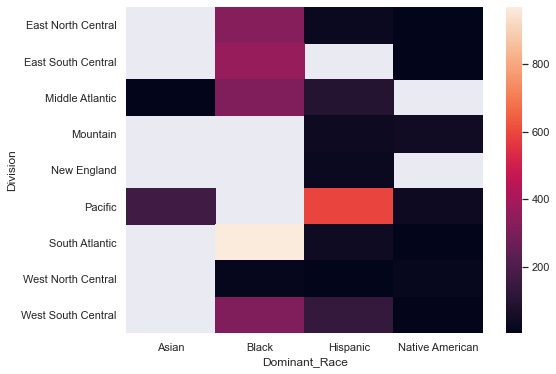

In [47]:
sns.set(rc={"figure.figsize": (8, 6)})
table2 = table.drop('White', axis=1)
ax = sns.heatmap(table2)

## 6. Distribution of education rates, poverty rates, median household income, land areas and water areas in cities with different predominant racial groups

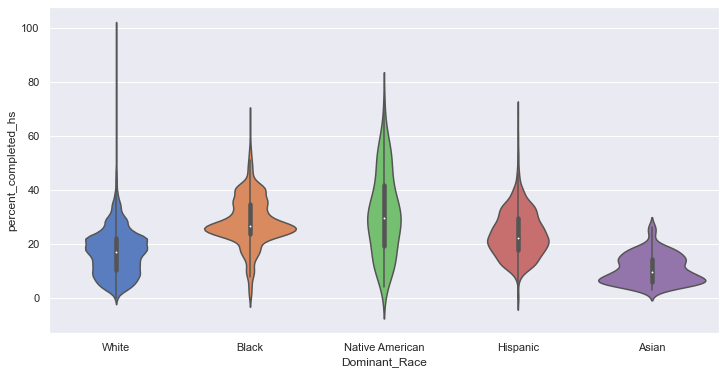

In [48]:
sns.set(rc={"figure.figsize": (12, 6)})
ax = sns.violinplot(x="Dominant_Race", y="percent_completed_hs", data=df, palette="muted")

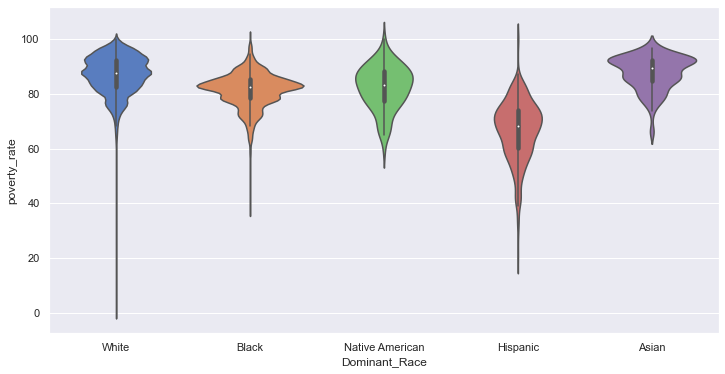

In [49]:
sns.set(rc={"figure.figsize": (12, 6)})
ax = sns.violinplot(x="Dominant_Race", y="poverty_rate", data=df, palette="muted")

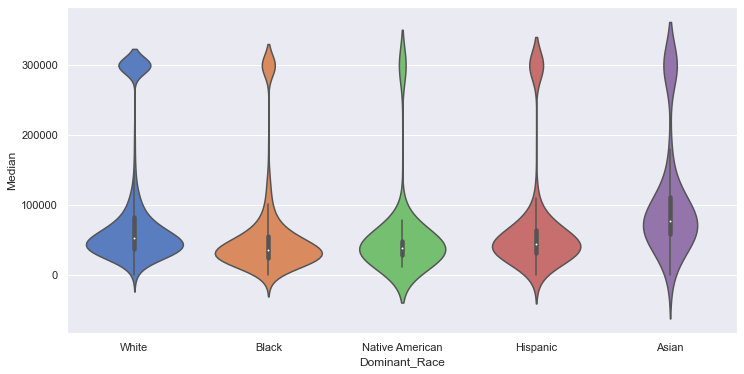

In [50]:
sns.set(rc={"figure.figsize": (12, 6)})
ax = sns.violinplot(x="Dominant_Race", y="Median", data=df, palette="muted")

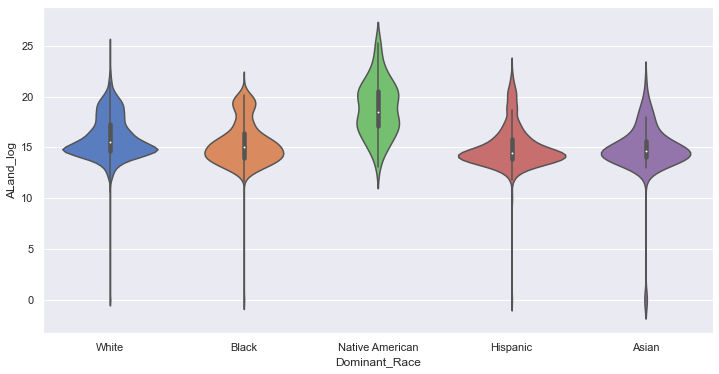

In [51]:
sns.set(rc={"figure.figsize": (12, 6)})
ax = sns.violinplot(x="Dominant_Race", y="ALand_log", data=df, palette="muted")

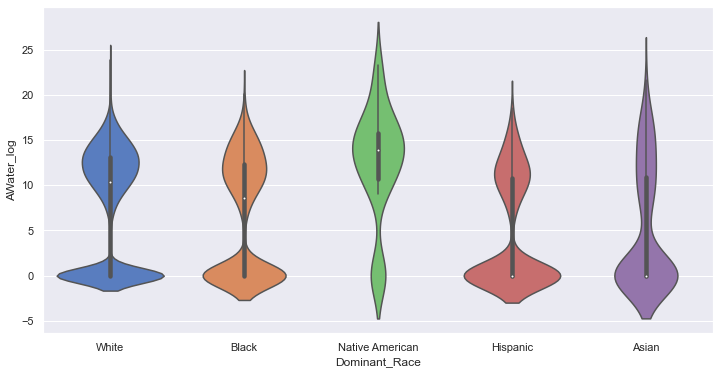

In [52]:
sns.set(rc={"figure.figsize": (12, 6)})
ax = sns.violinplot(x="Dominant_Race", y="AWater_log", data=df, palette="muted")

## 7. Relationship between race and the education rate, the poverty rate, the area of land and water it occupies

In [53]:
land_areas = [(df['ALand']*df['share_white']/100).sum(), (df['ALand']*df['share_black']/100).sum(), (df['ALand']*df['share_native_american']/100).sum(), (df['ALand']*df['share_asian']/100).sum(), (df['ALand']*df['share_hispanic']/100).sum()]
water_areas = [(df['AWater']*df['share_white']/100).sum(), (df['AWater']*df['share_black']/100).sum(), (df['AWater']*df['share_native_american']/100).sum(), (df['AWater']*df['share_asian']/100).sum(), (df['AWater']*df['share_hispanic']/100).sum()]
completed_hs_nums = [(df['percent_completed_hs']/100*df['sum_w']*df['share_white']/100).sum(), (df['percent_completed_hs']/100*df['sum_w']*df['share_black']/100).sum(), (df['percent_completed_hs']/100*df['sum_w']*df['share_native_american']/100).sum(), (df['percent_completed_hs']/100*df['sum_w']*df['share_asian']/100).sum(), (df['percent_completed_hs']/100*df['sum_w']*df['share_hispanic']/100).sum()]
poverty_nums = [(df['poverty_rate']/100*df['sum_w']*df['share_white']/100).sum(), (df['poverty_rate']/100*df['sum_w']*df['share_black']/100).sum(), (df['poverty_rate']/100*df['sum_w']*df['share_native_american']/100).sum(), (df['poverty_rate']/100*df['sum_w']*df['share_asian']/100).sum(), (df['poverty_rate']/100*df['sum_w']*df['share_hispanic']/100).sum()]
household_nums = [(df['sum_w']*df['share_white']/100).sum(), (df['sum_w']*df['share_black']/100).sum(), (df['sum_w']*df['share_native_american']/100).sum(), (df['sum_w']*df['share_asian']/100).sum(), (df['sum_w']*df['share_hispanic']/100).sum()]

In [54]:
d = {'Race': ['White', 'Black', 'Native American', 'Asian', 'Hispanic'], 'ALand': land_areas, 'AWater': water_areas, 'NCompletedHS':completed_hs_nums, 'NPoverty':poverty_nums, 'NHousehold': household_nums}
ct = pd.DataFrame(data=d)
ct = ct.set_index('Race')
ct

,ALand,AWater,NCompletedHS,NPoverty,NHousehold
Race,,,,,
White,2.374116e+12,1.071993e+11,2.028190e+06,9.910756e+06,1.147481e+07
Black,1.777906e+11,8.135535e+09,6.607738e+05,2.287213e+06,2.746697e+06
Native American,4.703403e+11,5.943438e+10,3.361281e+04,1.308993e+05,1.559272e+05
Asian,2.642516e+10,3.596406e+09,1.098962e+05,5.898481e+05,6.836236e+05
Hispanic,3.399765e+11,1.029480e+10,5.703574e+05,2.250357e+06,2.814702e+06


In [55]:
detailCT = ct.copy()
alandperc = np.round(ct.ALand/sum(land_areas) * 100,decimals=2)
awaterperc = np.round(ct.AWater/sum(water_areas) * 100,decimals=2)
ncompletedhsperc = np.round(ct.NCompletedHS/sum(completed_hs_nums) * 100,decimals=2)
npovertyperc = np.round(ct.NPoverty/sum(poverty_nums) * 100,decimals=2)
nhouseholdperc = np.round(ct.NHousehold/sum(household_nums) * 100,decimals=2)
detailCT.ALand = detailCT.ALand.astype('str') + " (" + alandperc.astype('str') + "%)"
detailCT.AWater = detailCT.AWater.astype('str') + " (" + awaterperc.astype('str') + "%)"
detailCT.NCompletedHS = detailCT.NCompletedHS.astype('str') + " (" + ncompletedhsperc.astype('str') + "%)"
detailCT.NPoverty = detailCT.NPoverty.astype('str') + " (" + npovertyperc.astype('str') + "%)"
detailCT.NHousehold = detailCT.NHousehold.astype('str') + " (" + nhouseholdperc.astype('str') + "%)"
detailCT

,ALand,AWater,NCompletedHS,NPoverty,NHousehold
Race,,,,,
White,2374116417237.102 (70.06%),107199270539.53502 (56.82%),2028189.9891514876 (59.6%),9910756.416845184 (65.34%),11474809.175331043 (64.19%)
Black,177790612379.167 (5.25%),8135535481.697 (4.31%),660773.7550985173 (19.42%),2287212.5221316684 (15.08%),2746696.606825381 (15.37%)
Native American,470340301133.9291 (13.88%),59434384332.73302 (31.5%),33612.80579683436 (0.99%),130899.26269884301 (0.86%),155927.17743657567 (0.87%)
Asian,26425164323.111004 (0.78%),3596405503.5620003 (1.91%),109896.16186579182 (3.23%),589848.0622666677 (3.89%),683623.6212605771 (3.82%)
Hispanic,339976483770.18097 (10.03%),10294797790.424 (5.46%),570357.4218615474 (16.76%),2250357.153138312 (14.84%),2814701.6852124487 (15.75%)


In [56]:
expectedALand = ct.NHousehold/sum(household_nums)*sum(land_areas)
expectedAWater = ct.NHousehold/sum(household_nums)*sum(water_areas)
expectedNCompletedHS = ct.NHousehold/sum(household_nums)*sum(completed_hs_nums)
expectedNPoverty = ct.NHousehold/sum(household_nums)*sum(poverty_nums)
ctExpected = ct.copy()
ctExpected.ALand = expectedALand
ctExpected.AWater = expectedAWater
ctExpected.NCompletedHS = expectedNCompletedHS
ctExpected.NPoverty = expectedNPoverty
ctExpected

,ALand,AWater,NCompletedHS,NPoverty,NHousehold
Race,,,,,
White,2.175242e+12,1.211049e+11,2.184345e+06,9.737334e+06,1.147481e+07
Black,5.206823e+11,2.898858e+10,5.228613e+05,2.330801e+06,2.746697e+06
Native American,2.955860e+10,1.645652e+09,2.968230e+04,1.323172e+05,1.559272e+05
Asian,1.295923e+11,7.214950e+09,1.301346e+05,5.801117e+05,6.836236e+05
Hispanic,5.335738e+11,2.970631e+10,5.358067e+05,2.388509e+06,2.814702e+06


In [57]:
alandPercent = np.round(ctExpected.ALand/sum(land_areas) * 100,decimals=2)
awaterPercent = np.round(ctExpected.AWater/sum(water_areas) * 100,decimals=2)
ncompletedPercent = np.round(ctExpected.NCompletedHS/sum(completed_hs_nums) * 100,decimals=2)
npovertyPercent = np.round(ctExpected.NPoverty/sum(poverty_nums) * 100,decimals=2)
nhouseholdPercent = np.round(ctExpected.NHousehold/sum(household_nums) * 100,decimals=2)
detailExp = ctExpected.copy()
detailExp.ALand = ctExpected.ALand.astype('str') + " (" + alandPercent.astype('str') + "%)"
detailExp.AWater = ctExpected.AWater.astype('str') + " (" + awaterPercent.astype('str') + "%)"
detailExp.NCompletedHS = ctExpected.NCompletedHS.astype('str') + " (" + ncompletedPercent.astype('str') + "%)"
detailExp.NPoverty = ctExpected.NPoverty.astype('str') + " (" + npovertyPercent.astype('str') + "%)"
detailExp.NHousehold = ctExpected.NHousehold.astype('str') + " (" + nhouseholdPercent.astype('str') + "%)"
detailExp

,ALand,AWater,NCompletedHS,NPoverty,NHousehold
Race,,,,,
White,2175242012990.5234 (64.19%),121104905527.98792 (64.19%),2184345.1818907405 (64.19%),9737333.66925273 (64.19%),11474809.175331043 (64.19%)
Black,520682284542.88995 (15.37%),28988580812.197803 (15.37%),522861.2875003717 (15.37%),2330801.405077956 (15.37%),2746696.606825381 (15.37%)
Native American,29558604604.61925 (0.87%),1645652298.3666544 (0.87%),29682.304390005735 (0.87%),132317.2291238482 (0.87%),155927.17743657567 (0.87%)
Asian,129592292064.9204 (3.82%),7214949966.00453 (3.82%),130134.6227645796 (3.82%),580111.7214835995 (3.82%),683623.6212605771 (3.82%)
Hispanic,533573784640.5372 (15.75%),29706305043.394146 (15.75%),535806.7372284809 (15.75%),2388509.3921425394 (15.75%),2814701.6852124487 (15.75%)


Text(0.5, 1.0, 'Expected land area')

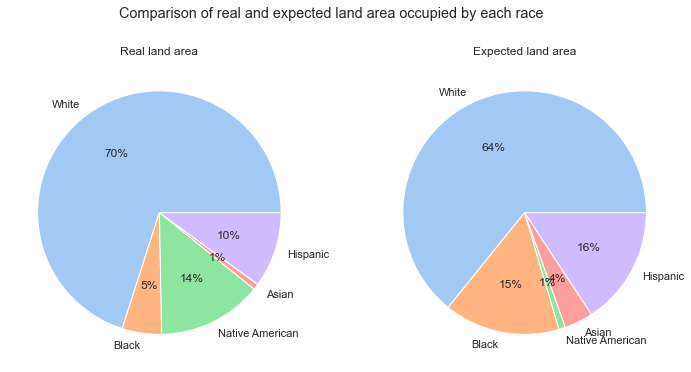

In [58]:
colors = sns.color_palette('pastel')[0:5]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of real and expected land area occupied by each race')

axes[0].pie(ct.ALand, labels = ct.index, colors = colors, autopct='%.0f%%')
axes[0].set_title('Real land area')

axes[1].pie(ctExpected.ALand, labels = ctExpected.index, colors = colors, autopct='%.0f%%')
axes[1].set_title('Expected land area')

Text(0.5, 1.0, 'Expected water area')

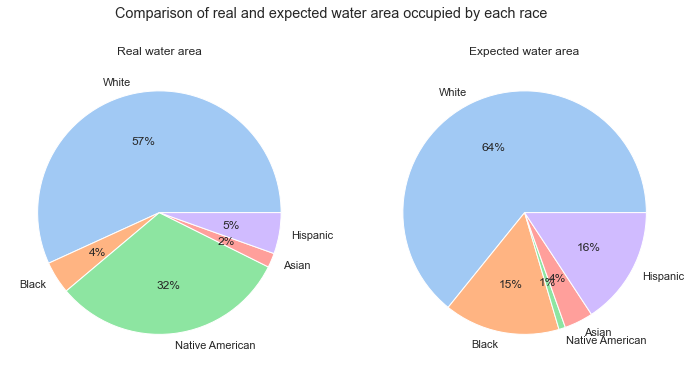

In [59]:
colors = sns.color_palette('pastel')[0:5]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of real and expected water area occupied by each race')

axes[0].pie(ct.AWater, labels = ct.index, colors = colors, autopct='%.0f%%')
axes[0].set_title('Real water area')

axes[1].pie(ctExpected.AWater, labels = ctExpected.index, colors = colors, autopct='%.0f%%')
axes[1].set_title('Expected water area')

Text(0.5, 1.0, 'Expected education rate')

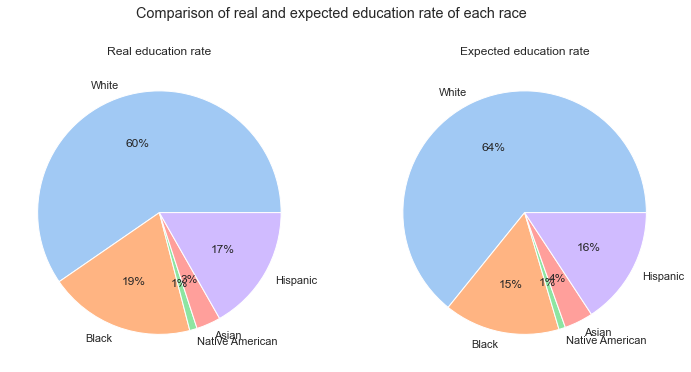

In [60]:
colors = sns.color_palette('pastel')[0:5]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of real and expected education rate of each race')

axes[0].pie(ct.NCompletedHS, labels = ct.index, colors = colors, autopct='%.0f%%')
axes[0].set_title('Real education rate')

axes[1].pie(ctExpected.NCompletedHS, labels = ctExpected.index, colors = colors, autopct='%.0f%%')
axes[1].set_title('Expected education rate')

Text(0.5, 1.0, 'Expected poverty rate')

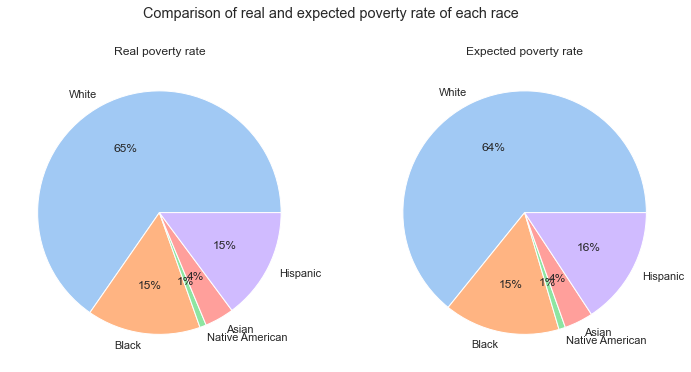

In [61]:
colors = sns.color_palette('pastel')[0:5]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of real and expected poverty rate of each race')

axes[0].pie(ct.NPoverty, labels = ct.index, colors = colors, autopct='%.0f%%')
axes[0].set_title('Real poverty rate')

axes[1].pie(ctExpected.NPoverty, labels = ctExpected.index, colors = colors, autopct='%.0f%%')
axes[1].set_title('Expected poverty rate')

## 8. Relationship between race and its income class

In [62]:
def findIncomeClass(income):
    if (income < 5000):
        return "1"
    elif (income < 10000):
        return "2"
    elif (income < 15000):
        return "3"
    elif (income < 25000):
        return "4"
    elif (income < 35000):
        return "5"
    elif (income < 50000):
        return "6"
    elif (income < 75000):
        return "7"
    elif (income < 150000):
        return "8"
    else:
        return "9"

In [63]:
Mean = df.Mean
Stdev = df.Stdev
sum_w = df.sum_w
share_white = df.share_white
share_black = df.share_black
share_native_american = df.share_native_american
share_asian = df.share_asian
share_hispanic = df.share_hispanic

In [80]:
d = {'Race': ['White', 'Black', 'Native American', 'Asian', 'Hispanic'], '1':[0,0,0,0,0], '2':[0,0,0,0,0], '3':[0,0,0,0,0], '4':[0,0,0,0,0], '5':[0,0,0,0,0], '6':[0,0,0,0,0], '7':[0,0,0,0,0], '8':[0,0,0,0,0], '9':[0,0,0,0,0]}
race_income = pd.DataFrame(data=d)
race_income.set_index('Race', inplace=True)

,1,2,3,4,5,6,7,8,9
Race,,,,,,,,,
White,0,0,0,0,0,0,0,0,0
Black,0,0,0,0,0,0,0,0,0
Native American,0,0,0,0,0,0,0,0,0
Asian,0,0,0,0,0,0,0,0,0
Hispanic,0,0,0,0,0,0,0,0,0


In [81]:
for i in range(len(df)):
    try:
        incomes = np.random.standard_normal(2*int(float(sum_w[i])))*int(Stdev[i])+int(Mean[i])
        white_num = int(float(sum_w[i])*float(share_white[i])/100)
        black_num = int(float(sum_w[i])*float(share_black[i])/100)
        native_american_num = int(float(sum_w[i])*float(share_native_american[i])/100)
        asian_num = int(float(sum_w[i])*float(share_asian[i])/100)
        hispanic_num = int(float(sum_w[i])*float(share_hispanic[i])/100)

        for j in range(len(incomes)):
            if j < white_num:
                race_income.loc['White', findIncomeClass(incomes[j])] += 1
            elif j < white_num+black_num:
                race_income.loc['Black', findIncomeClass(incomes[j])] += 1
            elif j < white_num+black_num+native_american_num:
                race_income.loc['Native American', findIncomeClass(incomes[j])] += 1
            elif j < white_num+black_num+native_american_num+asian_num:
                race_income.loc['Asian', findIncomeClass(incomes[j])] += 1
            elif j < white_num+black_num+native_american_num+asian_num+hispanic_num:
                race_income.loc['Hispanic', findIncomeClass(incomes[j])] += 1
            else:
                break
    except:
        pass

In [83]:
race_income

,1,2,3,4,5,6,7,8,9
Race,,,,,,,,,
White,1380080,273859,312276,726552,838182,1369284,2210586,3565821,789526
Black,386763,76934,87260,200626,224167,350947,524460,748877,149268
Native American,18786,3757,4396,9991,11161,18129,28540,40630,6684
Asian,75752,13771,15565,36035,41690,68604,115570,226754,76716
Hispanic,347818,70124,79492,185328,211755,340970,536435,841493,185890


In [82]:
chi2, p, dof, ex = chi2_contingency(race_income)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
expected = pd.DataFrame(ex)
expected['Race'] = ['White', 'Black', 'Native American', 'Asian', 'Hispanic']
expected.set_index('Race', inplace=True)
expected.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
expected

chi2 =  68981.71016904058
p-val =  0.0
degree of freedom =  32
Expected:


,1,2,3,4,5,6,7,8,9
Race,,,,,,,,,
White,1.420913e+06,281999.070183,320939.762186,745144.651615,853470.962549,1.381508e+06,2.196840e+06,3.488335e+06,777015.508679
Black,3.406996e+05,67616.377406,76953.388784,178667.191891,204641.152437,3.312514e+05,5.267477e+05,8.364162e+05,186309.032334
Native American,1.760612e+04,3494.170231,3976.673264,9232.875334,10575.115826,1.711788e+04,2.722042e+04,4.322297e+04,9627.778054
Asian,8.308452e+04,16489.230192,18766.195268,43570.575176,49904.700589,8.078044e+04,1.284550e+05,2.039722e+05,45434.148337
Hispanic,3.468961e+05,68846.151988,78352.980498,181916.705984,208363.068598,3.372760e+05,5.363279e+05,8.516285e+05,189697.532595
